# PA 2: Classification - Decision Tree

## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]

### Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 75% for training, and 25% for testing the classifier.  [2 points]

# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization with depth of 4, 5, 6.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points]  like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [2 points]


4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy. [1 points]

6) Compare the results of DT(gini), DT(entropy) and Naive Bayes. [2 points]

7) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
# loading the cardio data into a dataframe and printing first five and last five records of the dataframe
heart_data = pd.read_csv('cardio_train.csv', sep = ";", encoding='latin1')
print("The first five records of the data are:")
display(heart_data.head(5))
print("\nThe last five records of the data are:")
display(heart_data.tail(5))


The first five records of the data are:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



The last five records of the data are:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [3]:
# describing data to understand various features of the dataset
heart_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# printing class labels - 0: No presence of cardiovascvular disease and 1: Presence of cardiovascular disease
print(heart_data.cardio.unique())

[0 1]


In [5]:
# splitting cardio dataset into 75% training data & 25% testing data
X = heart_data.drop('cardio', axis=1)
y = heart_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25,random_state=10)

****************************************************************************************************
Gini based decision tree classifier model
****************************************************************************************************
Accuracy for gini based decision tree is: 0.6307

 Confusion matrix for Gini based decision tree is as follows:



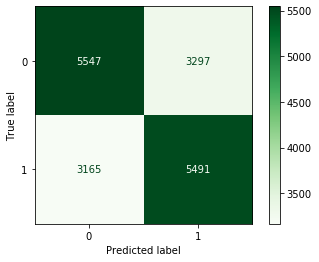



 Classification Report is as given below:

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      8844
           1       0.62      0.63      0.63      8656

    accuracy                           0.63     17500
   macro avg       0.63      0.63      0.63     17500
weighted avg       0.63      0.63      0.63     17500

****************************************************************************************************
Entropy based decision tree classifier model
****************************************************************************************************
Accuracy for entropy based decision tree is: 0.6317

 Confusion matrix for Entropy based decision tree is as follows:



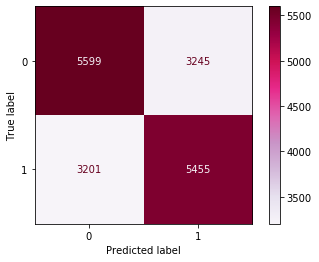



 Classification Report is as given below:

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      8844
           1       0.63      0.63      0.63      8656

    accuracy                           0.63     17500
   macro avg       0.63      0.63      0.63     17500
weighted avg       0.63      0.63      0.63     17500



In [6]:
##Training decisions trees using gini and entropy methods for splitting the nodes

accuracies = []

# gini
print('*'*100)
print("Gini based decision tree classifier model")
print('*'*100)
gini_based_tree=tree.DecisionTreeClassifier(criterion='gini',random_state=10) # creating a decisoion tree with gini splitting clriteria
gini_based_tree.fit(X_train,y_train) # training the model with train dataset
predictions = gini_based_tree.predict(X_test) # predicting the outcome of the test dataset

# evaluating the gini-based-decision-tree
print('Accuracy for gini based decision tree is: %.4f' % accuracy_score(y_test, predictions))
accuracies.append(accuracy_score(y_test, predictions))
print("\n Confusion matrix for Gini based decision tree is as follows:\n")
plot_confusion_matrix(gini_based_tree, X_test, y_test, cmap="Greens")
plt.show()
print("\n\n Classification Report is as given below:\n")
print(classification_report(y_test, predictions))

# entropy
print('*'*100)
print("Entropy based decision tree classifier model")
print('*'*100)
entropy_based_tree=tree.DecisionTreeClassifier(criterion='entropy',random_state=10) # creating a decisoion tree with entropy splitting clriteria
entropy_based_tree.fit(X_train,y_train) # training the model with train dataset
predictions = entropy_based_tree.predict(X_test) # predicting the outcome of the test dataset

# evaluating the entropy-based-decision-tree
print('Accuracy for entropy based decision tree is: %.4f' % accuracy_score(y_test, predictions))
accuracies.append(accuracy_score(y_test, predictions))
print("\n Confusion matrix for Entropy based decision tree is as follows:\n")
plot_confusion_matrix(entropy_based_tree, X_test, y_test, cmap="PuRd")
plt.show()
print("\n\n Classification Report is as given below:\n")
print(classification_report(y_test, predictions))


The following decision is modeled using gini and with a maximum depth of 4


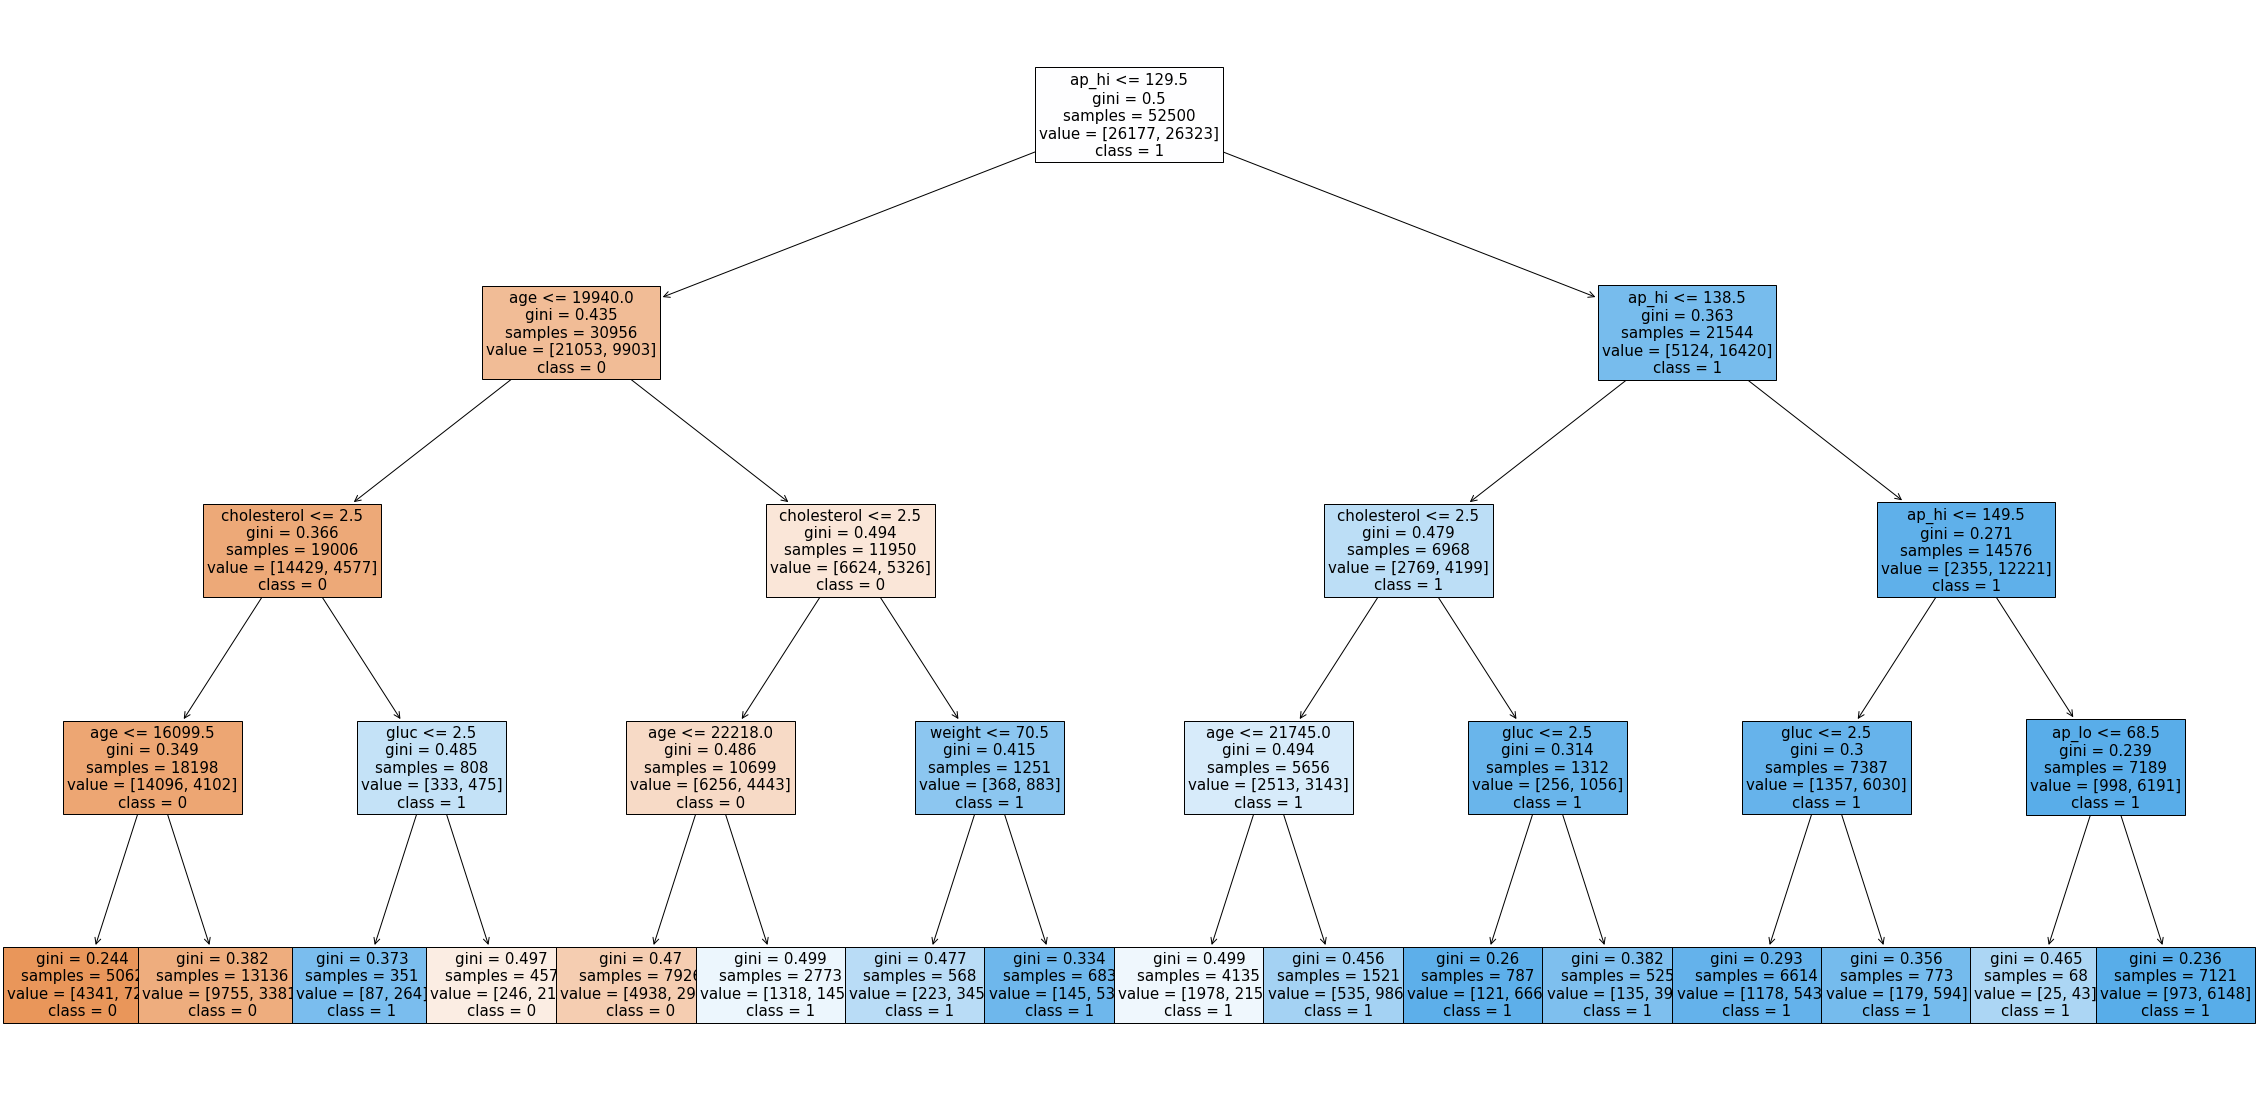

In [7]:
# Plotting the gini based & entropy based decision trees for max depts of 4, 5 & 6

features = list(heart_data.columns)[:-1]
class_labels=['0','1']


# gini based tree - max depth of 4
dt_classifier=tree.DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=10)
dt_classifier.fit(X_train,y_train)
print("The following decision is modeled using gini and with a maximum depth of 4")
plt.figure(figsize=(40,20))
tree.plot_tree(dt_classifier,feature_names=features,class_names=class_labels,filled=True,fontsize=15)
plt.show()


The following decision is modeled using gini and with a maximum depth of 5


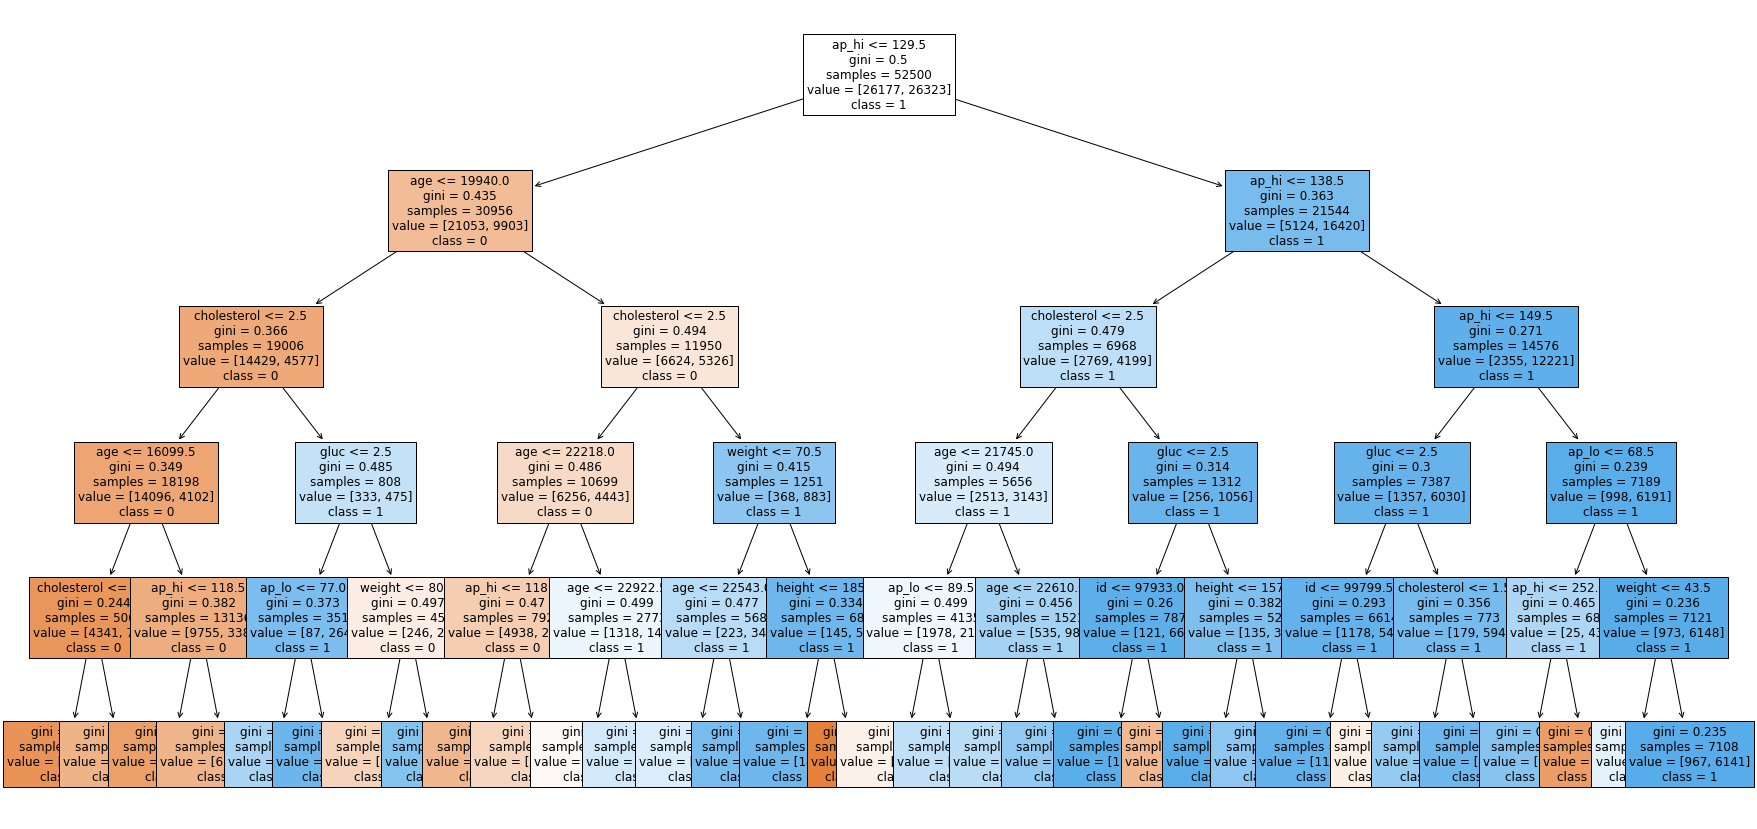

In [8]:
# Plotting the gini based & entropy based decision trees for max depts of 4, 5 & 6

features = list(heart_data.columns)[:-1]
class_labels=['0','1']


# gini based tree - max depth of 5
dt_classifier=tree.DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=10)
dt_classifier.fit(X_train,y_train)
print("The following decision is modeled using gini and with a maximum depth of 5")
plt.figure(figsize=(30,15))
tree.plot_tree(dt_classifier,feature_names=features,class_names=class_labels,filled=True,fontsize=12)
plt.show()


The following decision is modeled using gini and with a maximum depth of 6


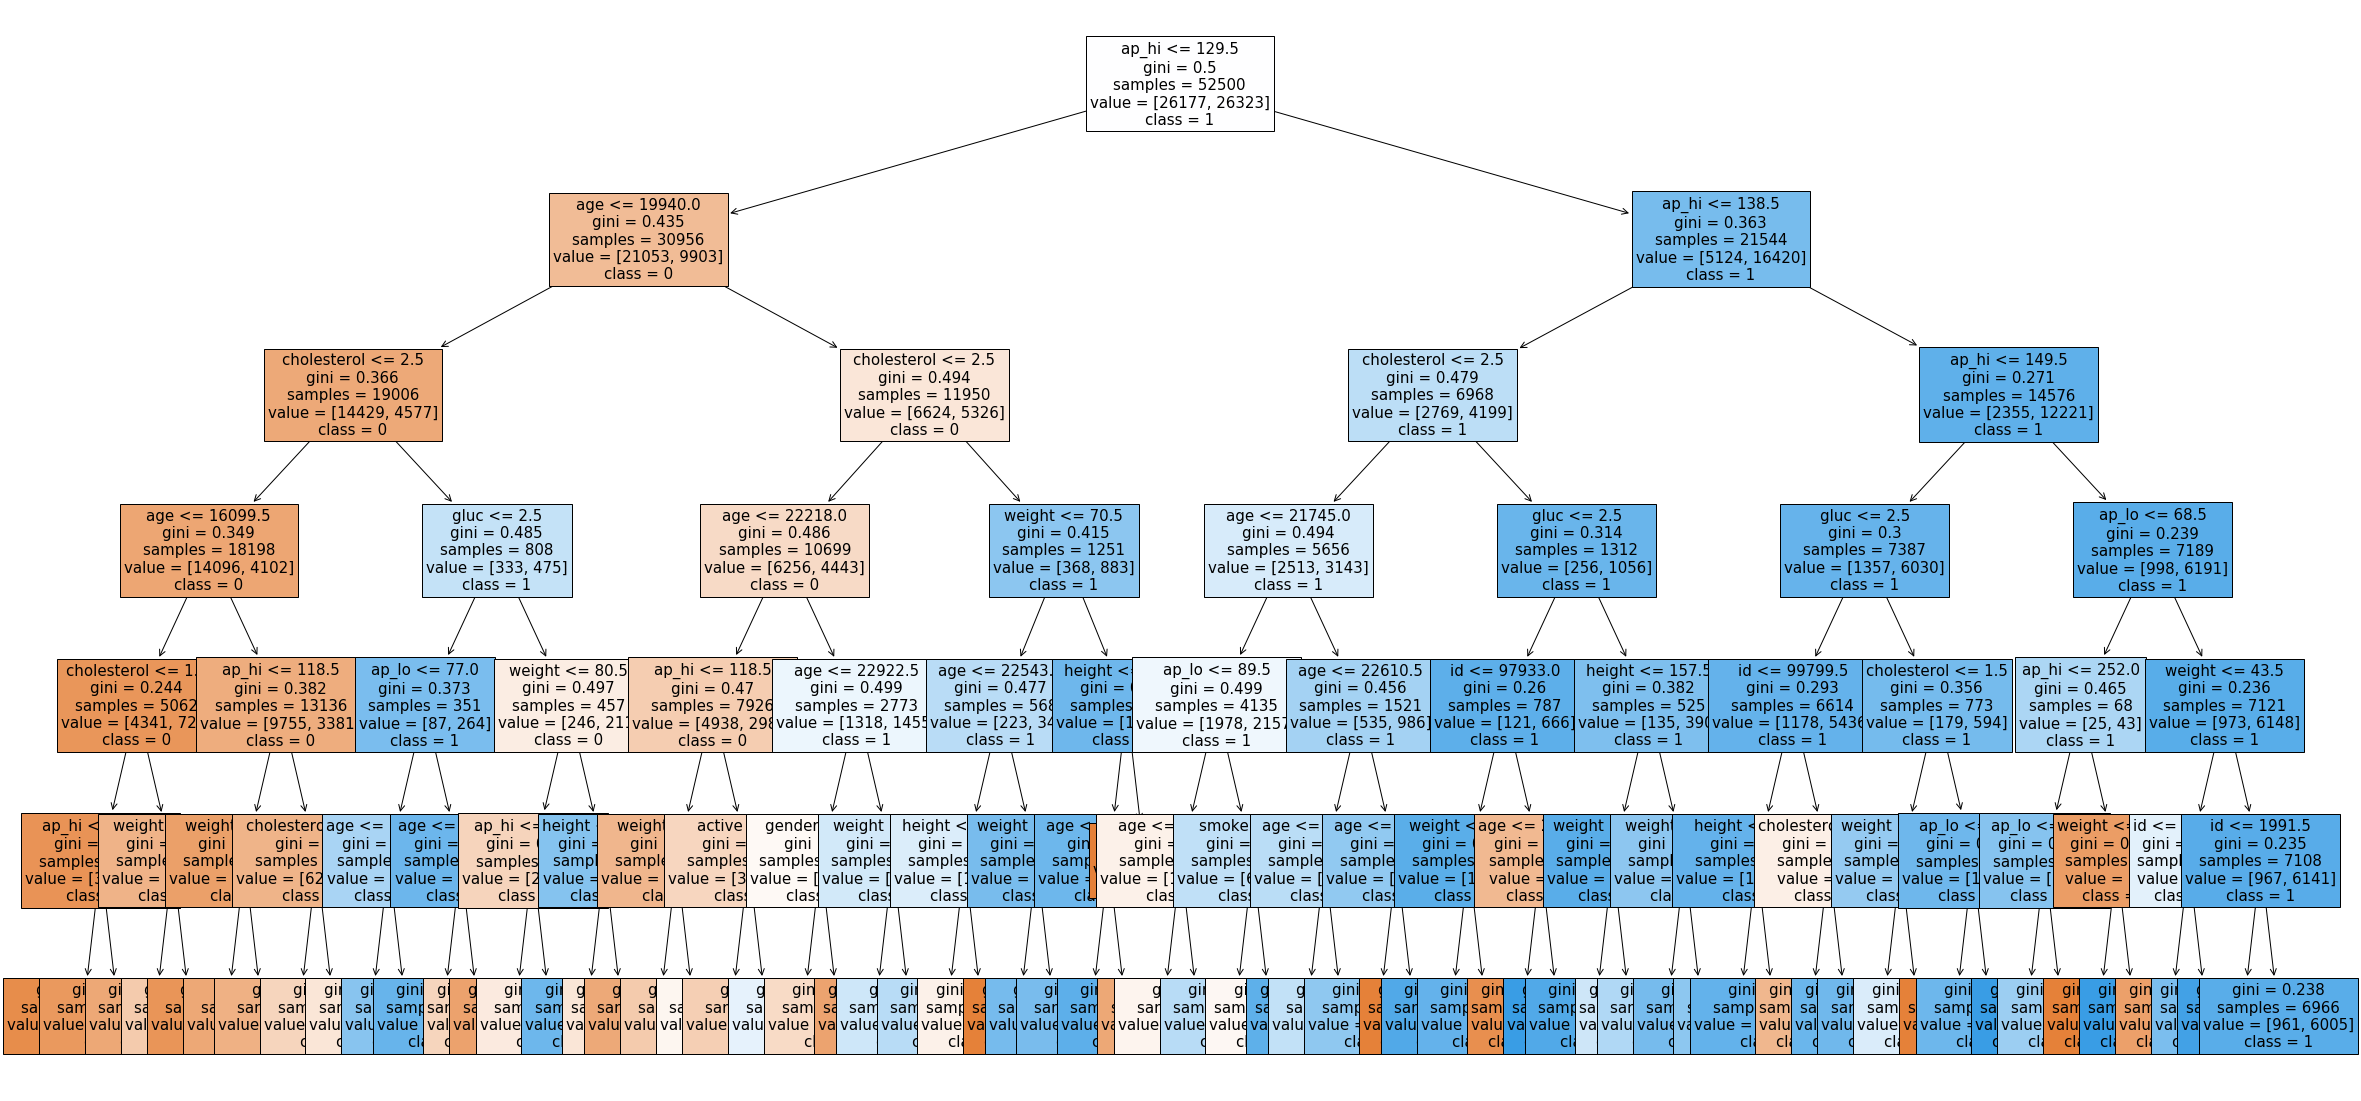

In [9]:
# Plotting the gini based & entropy based decision trees for max depts of 4, 5 & 6

features = list(heart_data.columns)[:-1]
class_labels=['0','1']


# gini based tree - max depth of 6
dt_classifier=tree.DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=10)
dt_classifier.fit(X_train,y_train)
print("The following decision is modeled using gini and with a maximum depth of 6")
plt.figure(figsize=(40,20))
tree.plot_tree(dt_classifier,feature_names=features,class_names=class_labels,filled=True,fontsize=15)
plt.show()

The following decision is modeled using entropy and with a maximum depth of 4


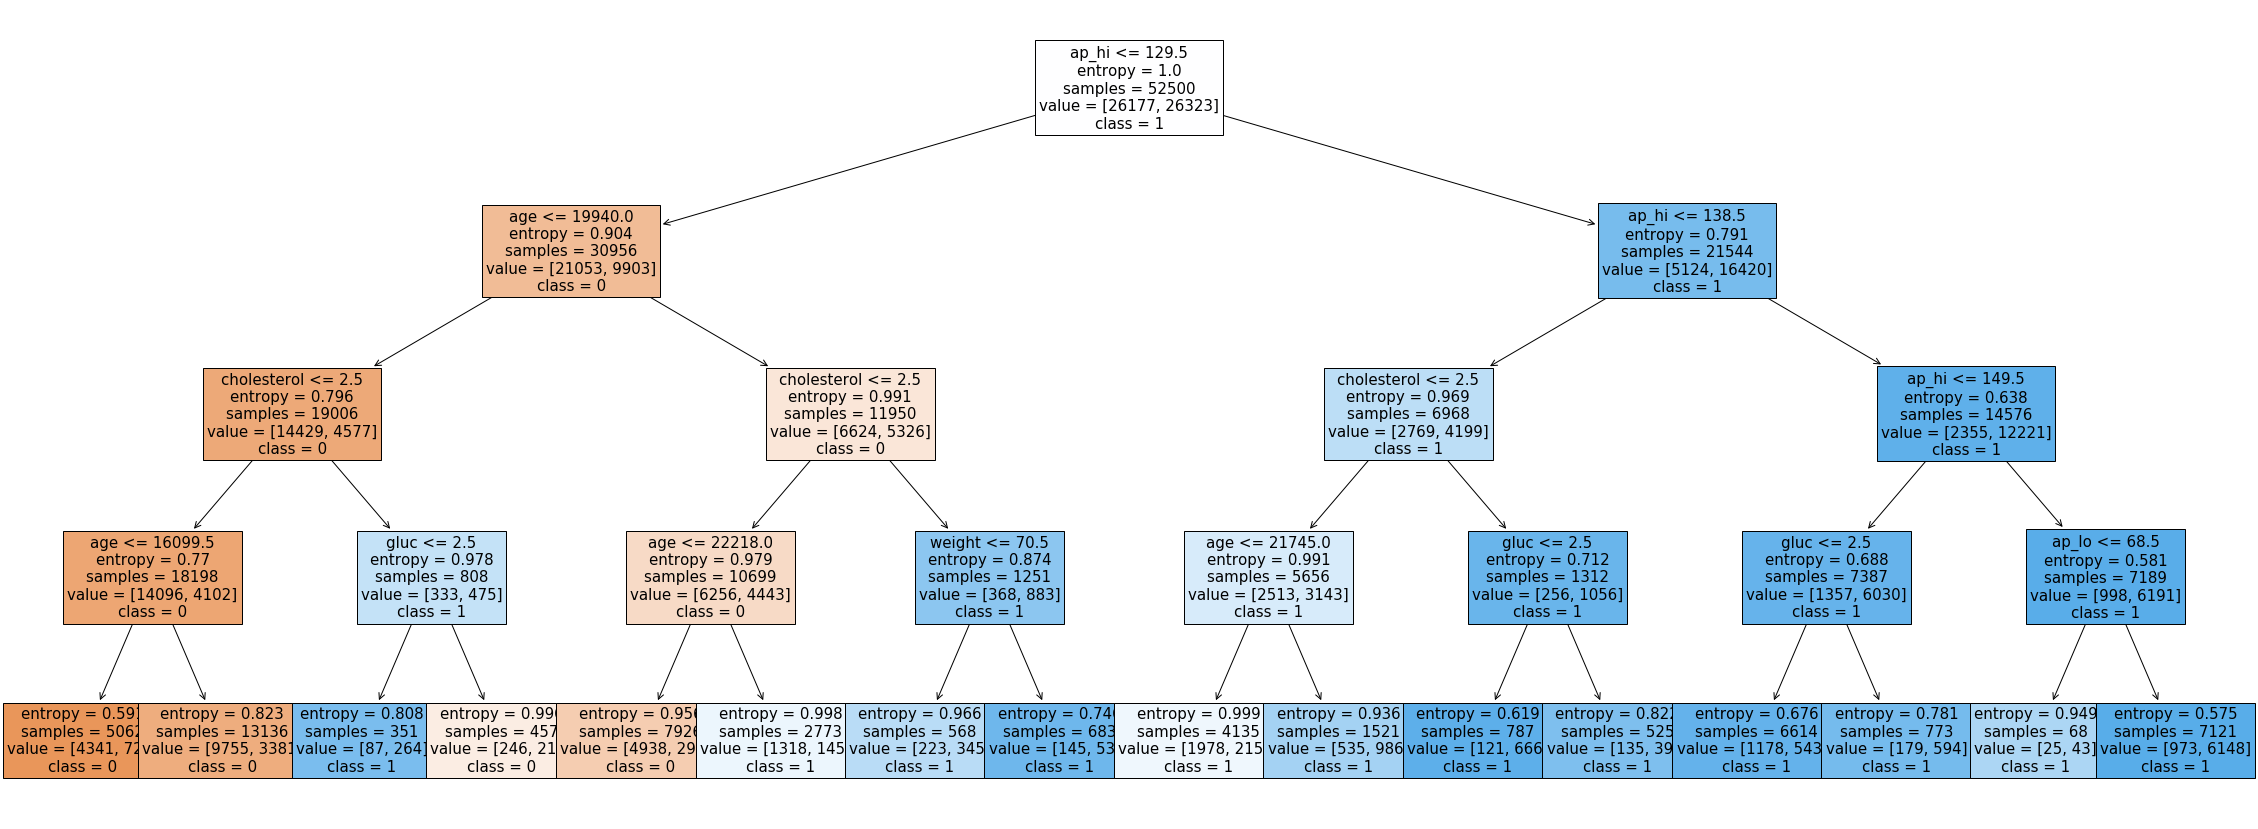

In [10]:
# Plotting the gini based & entropy based decision trees for max depts of 4, 5 & 6

features = list(heart_data.columns)[:-1]
class_labels=['0','1']


# gini based tree - max depth of 4
dt_classifier=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=10)
dt_classifier.fit(X_train,y_train)
print("The following decision is modeled using entropy and with a maximum depth of 4")
plt.figure(figsize=(40,15))
tree.plot_tree(dt_classifier,feature_names=features,class_names=class_labels,filled=True,fontsize=15)
plt.show()


The following decision is modeled using entropy and with a maximum depth of 5


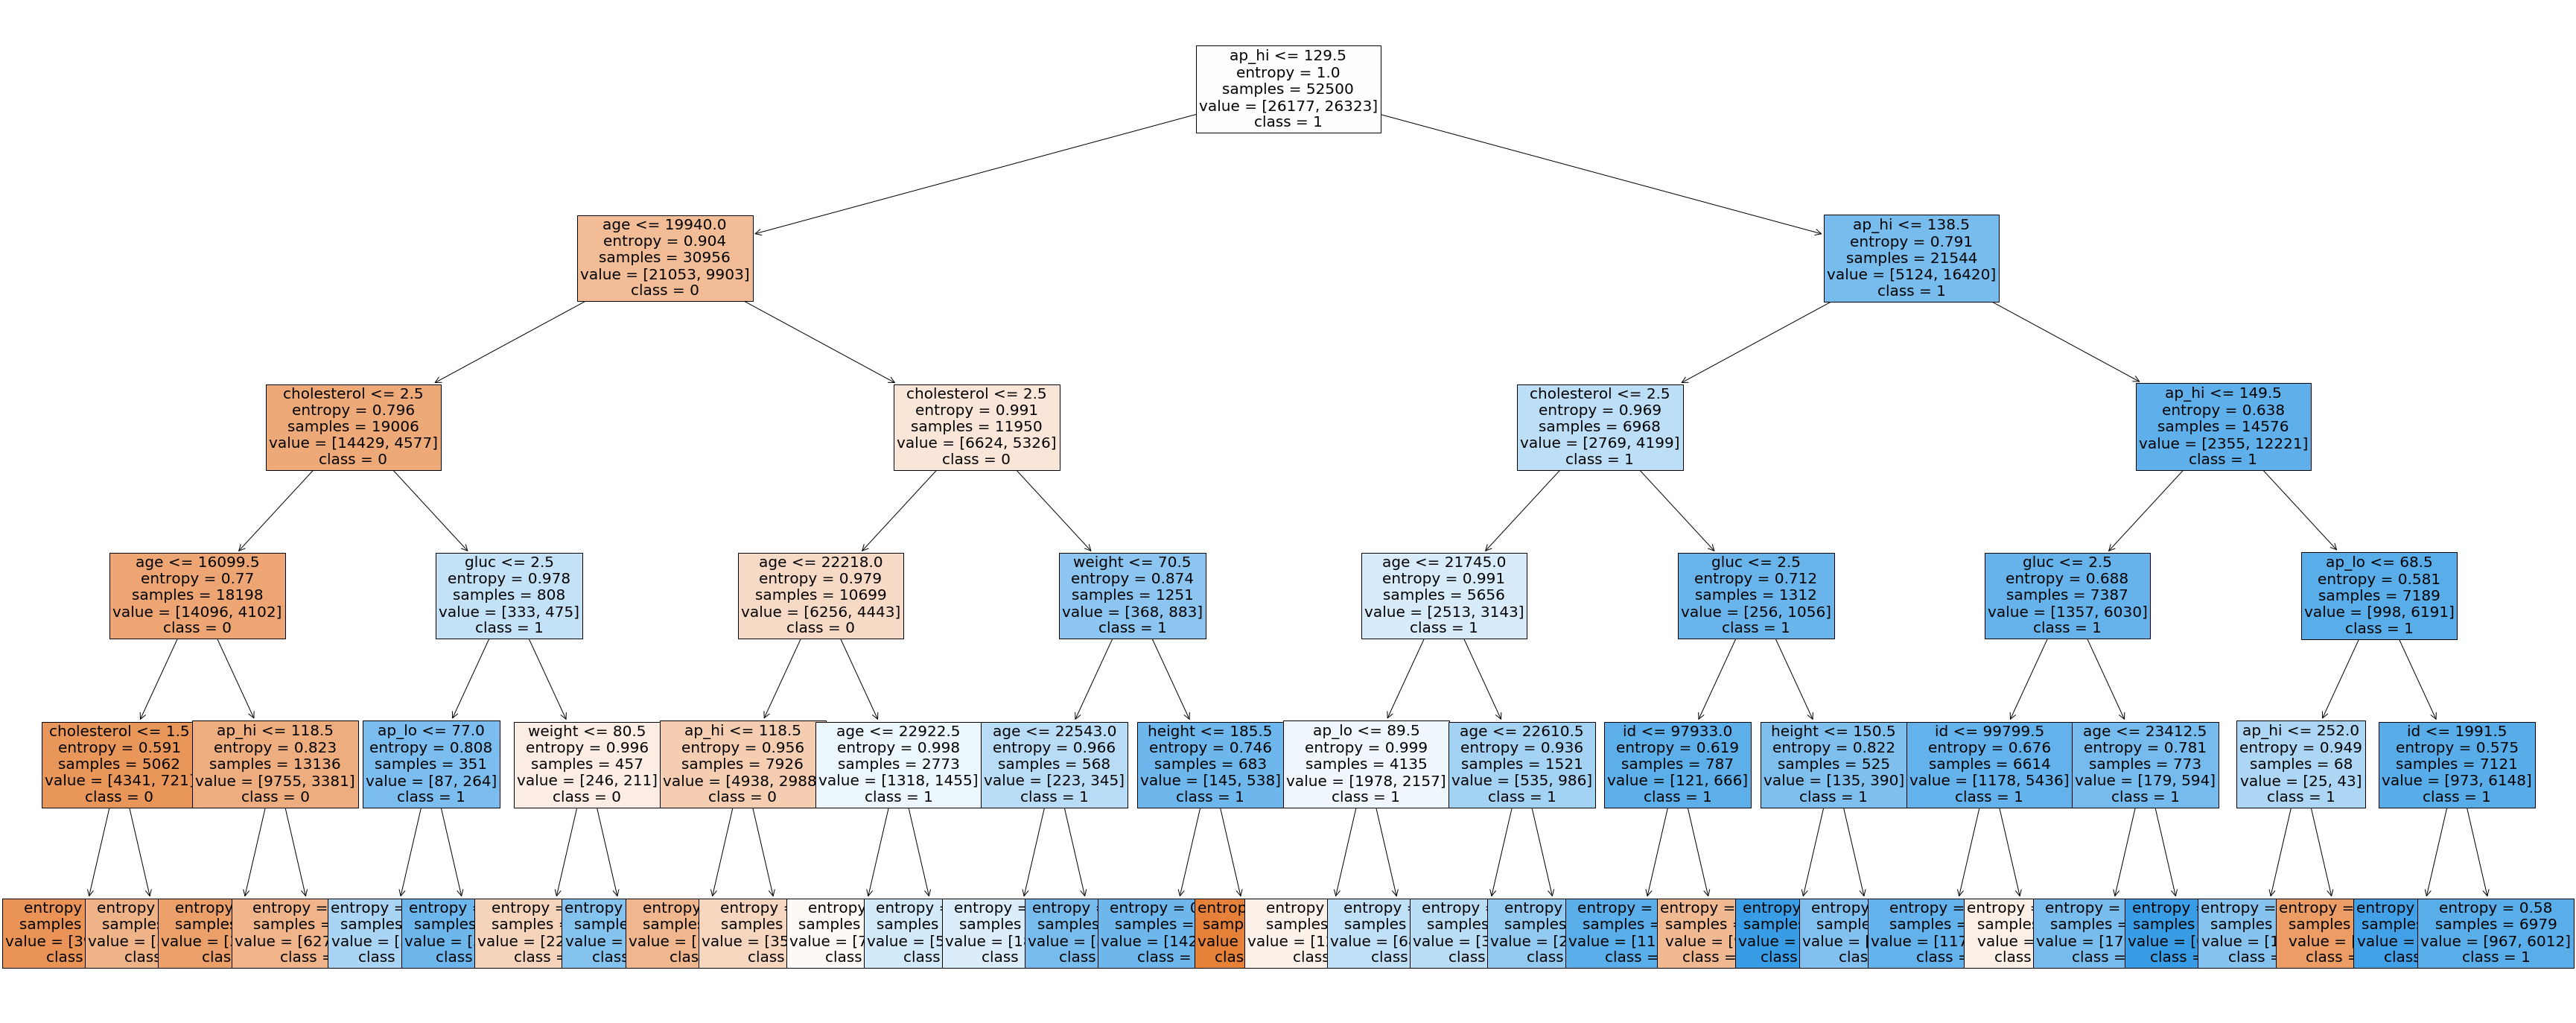

In [11]:
# Plotting the gini based & entropy based decision trees for max depts of 4, 5 & 6

features = list(heart_data.columns)[:-1]
class_labels=['0','1']


# gini based tree - max depth of 5
dt_classifier=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=10)
dt_classifier.fit(X_train,y_train)
print("The following decision is modeled using entropy and with a maximum depth of 5")
plt.figure(figsize=(60,25))
tree.plot_tree(dt_classifier,feature_names=features,class_names=class_labels,filled=True,fontsize=20)
plt.show()


The following decision is modeled using entropy and with a maximum depth of 6


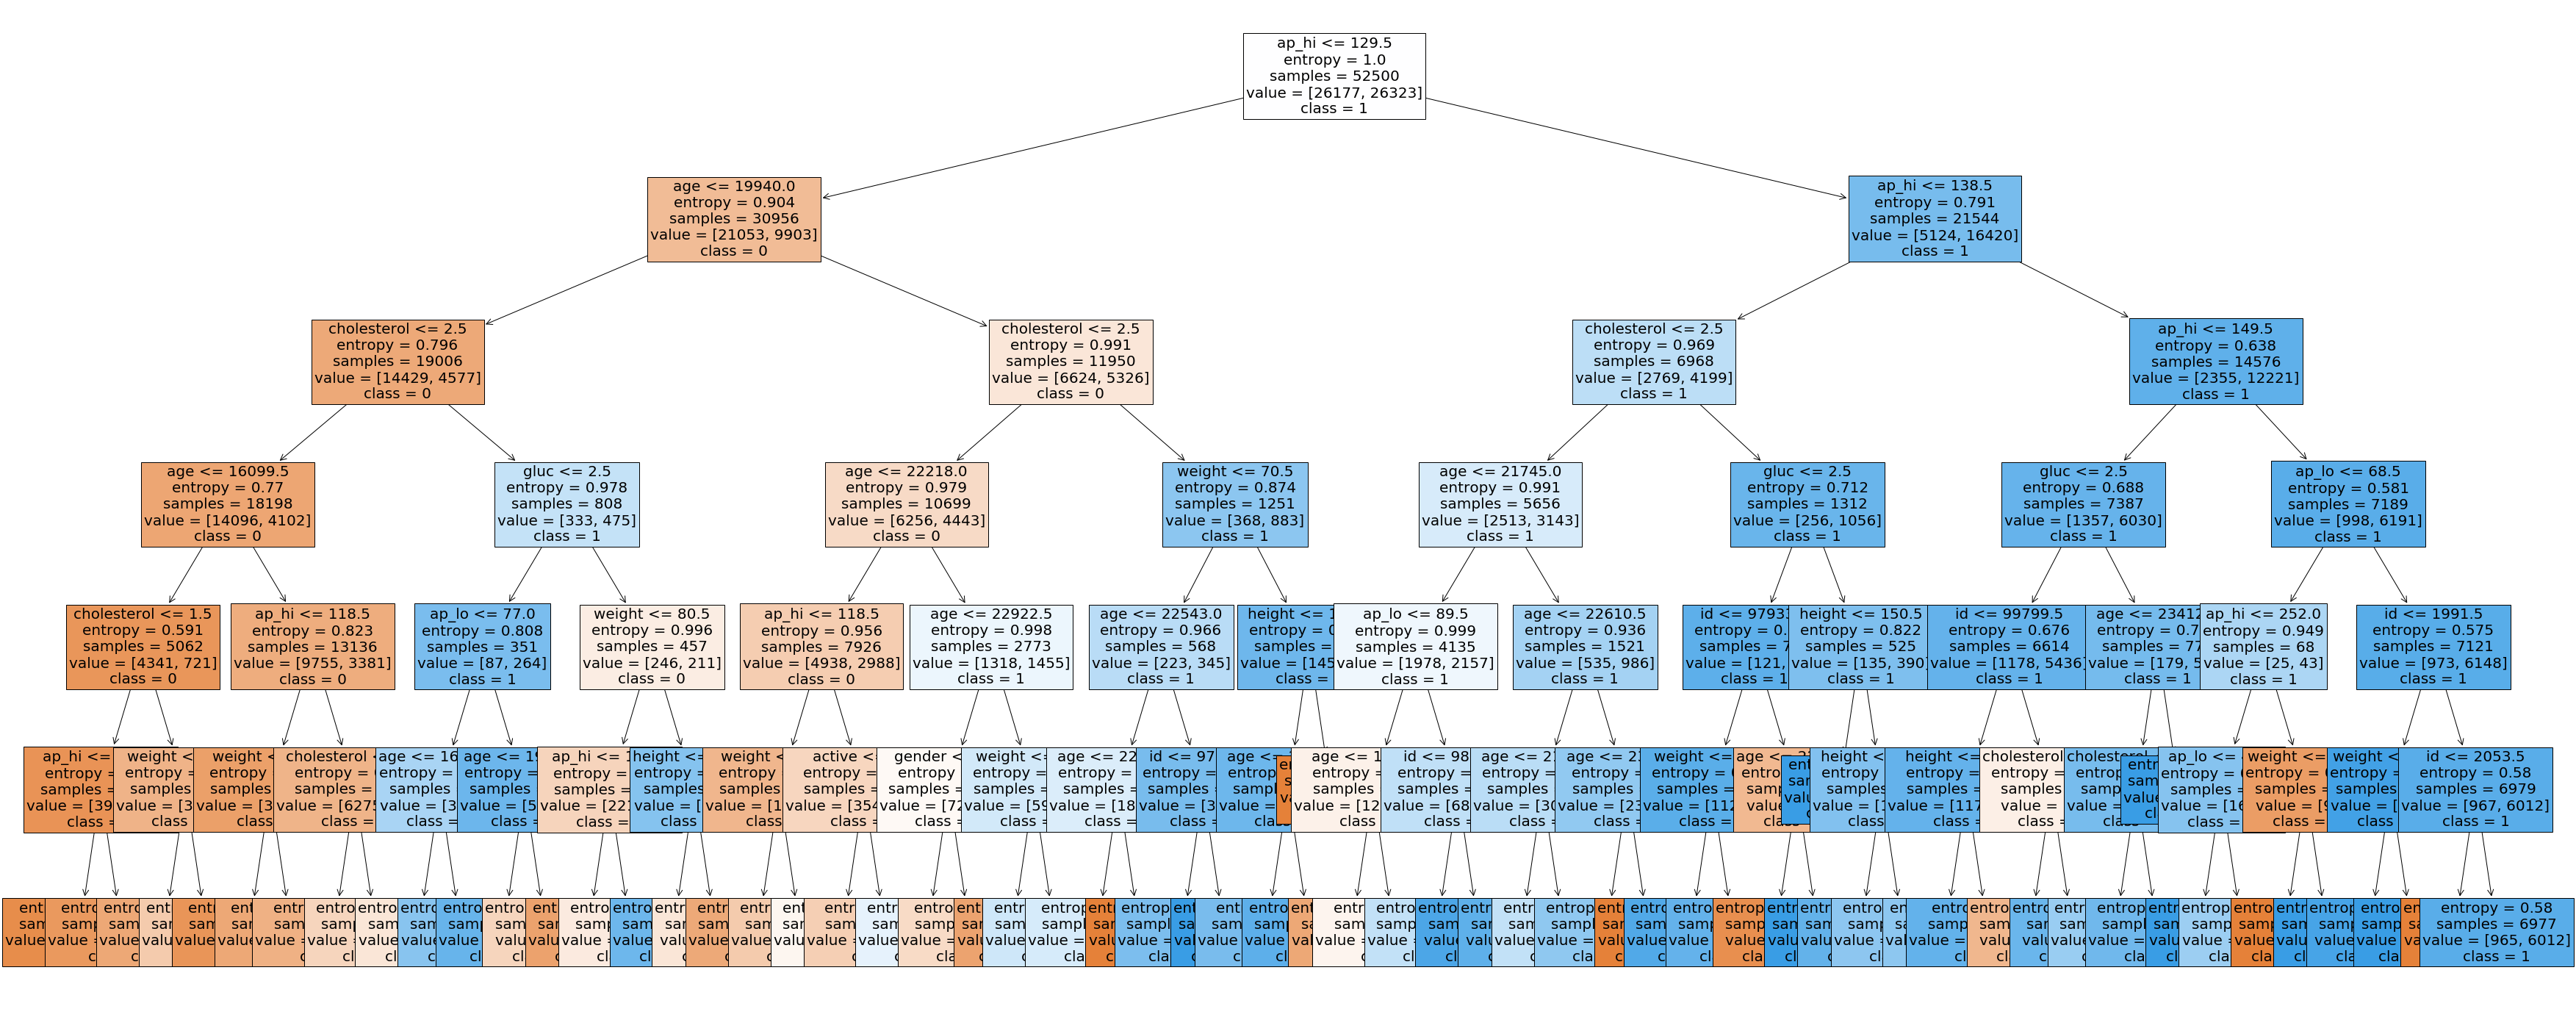

In [12]:
# Plotting the gini based & entropy based decision trees for max depts of 4, 5 & 6

features = list(heart_data.columns)[:-1]
class_labels=['0','1']


# gini based tree - max depth of 6
dt_classifier=tree.DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=10)
dt_classifier.fit(X_train,y_train)
print("The following decision is modeled using entropy and with a maximum depth of 6")
plt.figure(figsize=(60,25))
tree.plot_tree(dt_classifier,feature_names=features,class_names=class_labels,filled=True,fontsize=20)
plt.show()

Below are the predictions of the test data with the naive bayes model
[0 0 0 ... 0 0 0]
Accuracy for naive bayes classification model is: 0.5499

 Confusion matrix for naive bayes classification model is as follows:



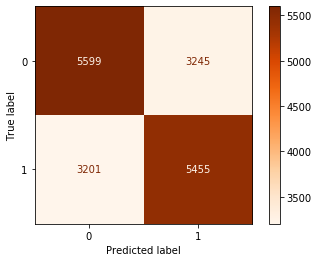



 Classification Report is as given below:

              precision    recall  f1-score   support

           0       0.53      0.96      0.68      8844
           1       0.77      0.13      0.22      8656

    accuracy                           0.55     17500
   macro avg       0.65      0.55      0.45     17500
weighted avg       0.65      0.55      0.46     17500



In [13]:
#Naive Bayes

#1. Naive bayes classifier (Gaussian) to predict the test data
nb_classifier = GaussianNB() # generating a NB classifier
nb_classifier.fit(X_train, y_train) # training the NB classifier using the train dataset
predictions = nb_classifier.predict(X_test) # predicting the test dataset outcomes using the nb classification model
print("Below are the predictions of the test data with the naive bayes model")
print(predictions)

# evaluating the naibe bayes classification model
print('Accuracy for naive bayes classification model is: %.4f' % accuracy_score(y_test, predictions))
accuracies.append(accuracy_score(y_test, predictions))
print("\n Confusion matrix for naive bayes classification model is as follows:\n")
plot_confusion_matrix(entropy_based_tree, X_test, y_test, cmap="Oranges")
plt.show()
print("\n\n Classification Report is as given below:\n")
print(classification_report(y_test, predictions))

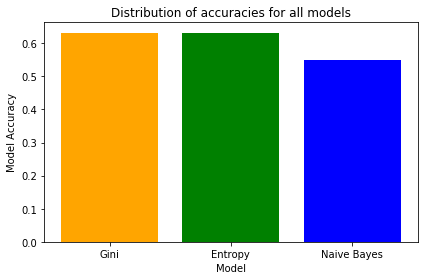

In [14]:
# comparing the accuracies of the three models - Gini based DT, Entropy based DT & Naive Bayes models
plt.bar(['Gini','Entropy', 'Naive Bayes'], height= accuracies,color=['orange','green','blue'])
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.xticks(['Gini','Entropy', 'Naive Bayes'])
plt.title("Distribution of accuracies for all models")
plt.tight_layout()

Scatter plot showing relation between height, weight & cardiovascular disease presence



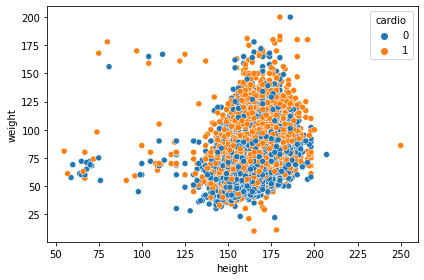

In [15]:
# Visualise the dataset for target variable

# Scatter plot showing relation between height, weight & cardiovascular disease presence
print("Scatter plot showing relation between height, weight & cardiovascular disease presence\n")
sb.scatterplot(data=heart_data, x="height", y="weight", hue="cardio")
plt.tight_layout()


Distribution of patient's cardiovascular disease presence by cholesterol levels



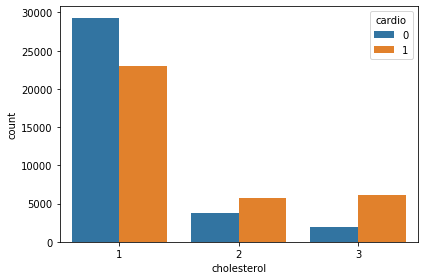

In [16]:
# looking at the distribution of patient's cardiovascular disease presence by cholesterol levels
print("Distribution of patient's cardiovascular disease presence by cholesterol levels\n")
ax = sb.countplot(x="cholesterol", hue="cardio", data=heart_data)
plt.tight_layout()

Distribution of patient's cardiovascular disease presence by gender & glucose levels



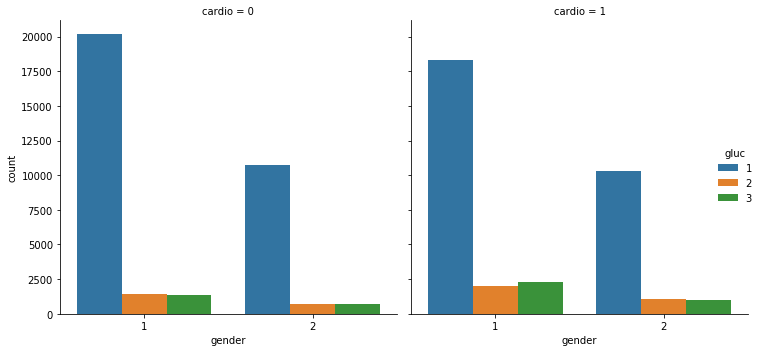

In [17]:

# looking at the distribution of patient's cardiovascular disease presence by gender & glucose levels
print("Distribution of patient's cardiovascular disease presence by gender & glucose levels\n")
cardio_plot = sb.catplot(x="gender", hue="gluc", col="cardio",data=heart_data, kind="count")
plt.tight_layout()